In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("mall_customers.csv")

df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,49,91213,39
1,2,Female,56,45746,53
2,3,Male,66,64377,42
3,4,Male,69,69045,58
4,5,Male,49,112888,39


In [4]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.describe()

Shape: (200, 5)

Columns: ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']


,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.405000,83628.405000,48.150000
std,57.879185,15.353816,39000.076662,28.584662
min,1.000000,18.000000,17368.000000,1.000000
25%,50.750000,32.750000,48425.250000,24.750000
50%,100.500000,46.000000,85910.000000,47.000000
75%,150.250000,56.000000,117832.750000,73.250000
max,200.000000,69.000000,149415.000000,99.000000


In [6]:
X = df[['Age', 'Annual_Income', 'Spending_Score']]
X.head()

,Age,Annual_Income,Spending_Score
0,49,91213,39
1,56,45746,53
2,66,64377,42
3,69,69045,58
4,49,112888,39


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled shape:", X_scaled.shape)

Scaled shape: (200, 3)


In [8]:
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

labels = kmeans.labels_

print("Cluster labels (first 20):", labels[:20])

Cluster labels (first 20): [3 2 0 2 3 4 1 0 3 1 1 1 0 1 0 4 2 4 0 4]


In [9]:
df_clusters = df.copy()
df_clusters['Cluster'] = labels

df_clusters.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,49,91213,39,3
1,2,Female,56,45746,53,2
2,3,Male,66,64377,42,0
3,4,Male,69,69045,58,2
4,5,Male,49,112888,39,3


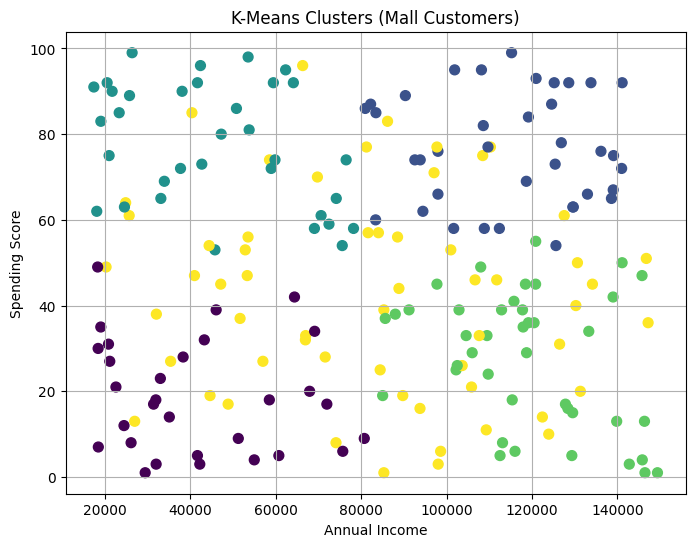

In [10]:
plt.figure(figsize=(8,6))

plt.scatter(
    df_clusters['Annual_Income'], 
    df_clusters['Spending_Score'], 
    c=df_clusters['Cluster'],
    s=50
)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("K-Means Clusters (Mall Customers)")
plt.grid(True)
plt.show()

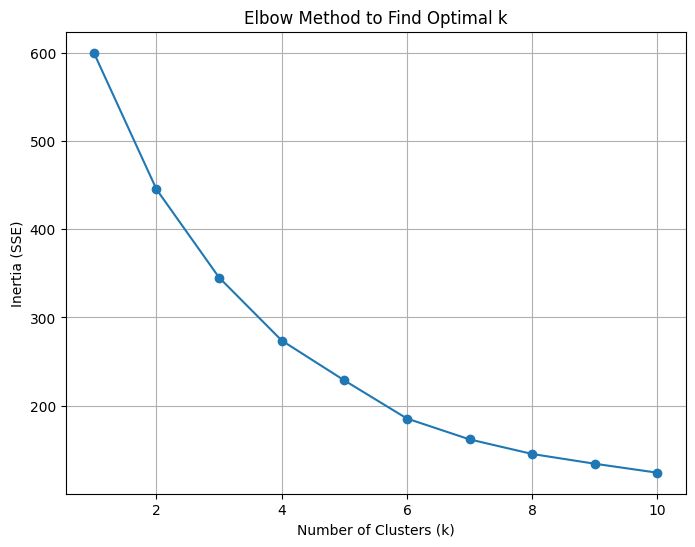

In [11]:
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Method to Find Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

In [12]:
cluster_summary = df_clusters.groupby('Cluster')[['Age','Annual_Income','Spending_Score']].mean()
cluster_summary

,Age,Annual_Income,Spending_Score
Cluster,,,
0,54.400000,41606.633333,18.900000
1,48.540541,114602.108108,76.594595
2,51.852941,45849.411765,77.588235
3,53.000000,118989.365854,27.658537
4,26.155172,82754.482759,42.362069
